In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.colors import ListedColormap
from datetime import datetime
from PIL import Image


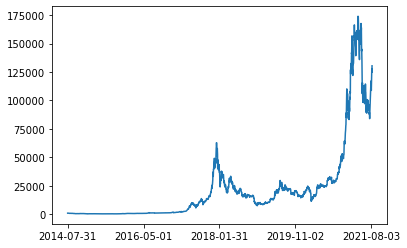

In [82]:
crix = pd.read_csv("crix.csv")
plt.plot(crix["date"],crix["v"])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(640))
plt.savefig('CRIX', transparent=True)

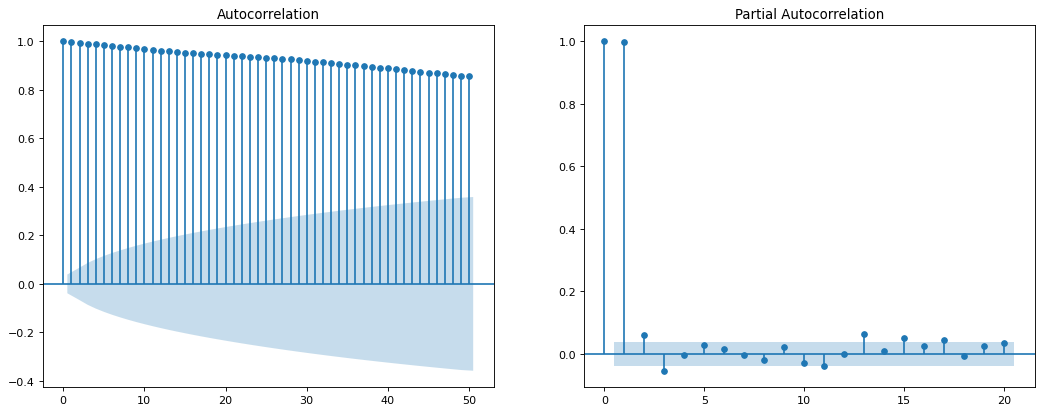

In [83]:
fig, ax = plt.subplots(1,2,figsize=(16,6), dpi= 80)
plot_acf(crix.v.tolist(), ax=ax[0], lags=50);
plot_pacf(crix.v.tolist(), ax=ax[1], lags=20);
plt.savefig('ACF_CRIX', transparent=True)

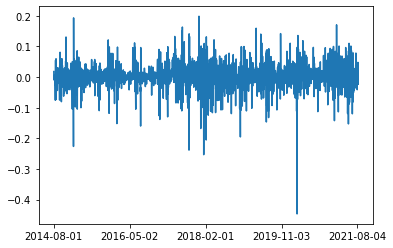

In [84]:
log_crix = pd.DataFrame(columns=["date", "v"])
log_crix["date"] = crix["date"][1:]
log_crix["v"] = np.diff(np.log(crix.v))
log_crix.to_csv("log_crix.csv")

plt.plot(log_crix["date"],log_crix["v"])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(640))
plt.savefig('LogCRIX', transparent=True)

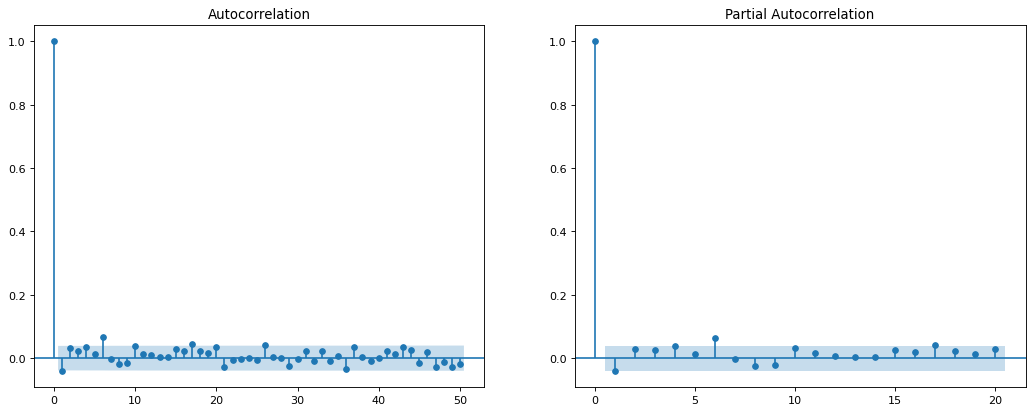

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(log_crix.v.tolist(), ax=ax1, lags=50);
plot_pacf(log_crix.v.tolist(), ax=ax2, lags=20);
plt.savefig('ACF_LCRIX', transparent=True)

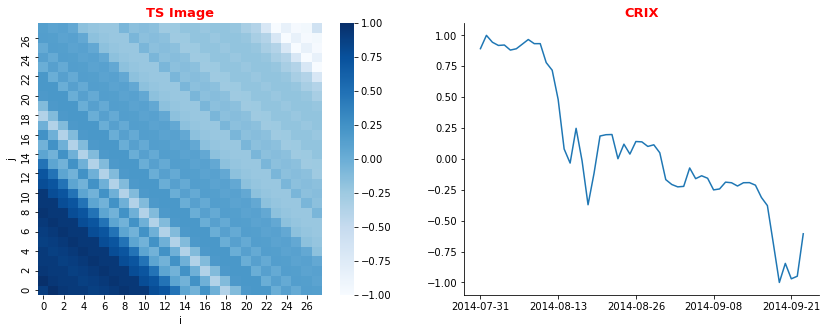

In [59]:
class TS():
    def __init__(self,path,start):
        self.data = pd.read_csv(path)
        self.data = self.data[start:].head(dim*2)

    def scale_data(self,a,b):
        self.a = a
        self.b = b
        self.minimum = np.min(self.data.v)
        self.maximum = np.max(self.data.v)

        self.data['price_sc'] = a+((self.data.v - self.minimum)*(b-a))/(self.maximum-self.minimum) 
        #print('min value in df:'+str(np.min(self.data.price_sc)))
        #print('max value in df:'+str(np.max(self.data.price_sc)))
        #print(self.data['price_sc'])

    def ts_image(self,n_rows,n_cols, image):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.seq_len = n_cols
        
        # 1 sequentialize the data
        seq_cont = []
        rec_mats = []
        y_images = []
        seqs = []
        for idx in range(self.data.price_sc.shape[0]-self.seq_len):
            row = self.data.price_sc.values[idx:idx+self.seq_len]
            
            #print('############')
            seq_cont.append(row)
            
            if (idx+1>=self.seq_len):
                #print(str(idx)+'/'+str(self.data.price_sc.shape[0]-self.seq_len-1))
                ts_matrix = np.array(seq_cont)[-self.seq_len:]#last 3 rows

                #flip to right dimension
                #ts_matrix = np.flip(ts_matrix,axis=0)
                
                ts=np.concatenate([ts_matrix[0,:],ts_matrix[1:,-1]],axis=0)
                seqs.append(ts_matrix)

                self.seqs = seqs
                self.y_images = y_images
                self.rec_mats = rec_mats
                
                if image == False: 
                    ts_matrix = np.flip(ts_matrix,axis=0)
                    return ts_matrix
                    break
                    
                else:
                    font = {'family': 'sans-serif',
                                    'color':  'red',
                                    'weight': 'bold',
                                    'size': 13,
                                    }

                    gridsize = (1,2)
                    fig = plt.figure(figsize=(14,5))
                    ax1 = plt.subplot2grid(gridsize, (0, 0))
                    ax3 = plt.subplot2grid(gridsize, (0, 1))

                    #Plot1
                    sns.heatmap(ts_matrix,ax=ax1,cmap='Blues')
                    ax1.set_title('TS Image',fontdict=font)
                    ax1.set_xlabel('i')
                    ax1.set_ylabel('j')
                    ax1.invert_yaxis()
                
                    #print(self.data['date'])
                    #print(ts)

                    ax3.plot(self.data['date'].head(self.n_cols*2-1),ts.flatten())
                    #ax3.set_ylim(-1.0, 1.0)
                
                    ax3.set_xticks(self.data['date'].values[np.arange(0,self.n_cols*2-1,2)].tolist())
                    # Hide the right and top spines
                    ax3.spines['right'].set_visible(False)
                    ax3.spines['top'].set_visible(False)

                    # Only show ticks on the left and bottom spines
                    ax3.yaxis.set_ticks_position('left')
                    ax3.xaxis.set_ticks_position('bottom')
                    ax3.xaxis.set_major_locator(plt.MultipleLocator(dim/2-1))

                    ax3.set_title('CRIX',fontdict=font)
                    #plt.savefig('singletsimage2.png',transparent=True)
                    break


dim = 28
img = TS('crix.csv',0)
test1=img.scale_data(-1,1)
test=img.ts_image(dim,dim,image=True)

In [12]:
### construct training set ###
# 1) split into training and test set; cut at 2019

crix.loc[crix.date == "2019-01-01"]

,date,v
1615,2019-01-01,9401.674578


In [18]:
crix_train = crix[0:1614]
crix_test = crix[1615:]

log_crix_train = log_crix[0:1614]
log_crix_test = log_crix[1615:]

In [14]:
class image():
    def __init__(self,dataset):
        self.data = dataset.head(dim*2)
        self.data_new = dataset.head(dim*2)

    def scale_data(self,a,b):
        self.a = a
        self.b = b
        self.minimum = np.min(self.data.v)
        self.maximum = np.max(self.data.v)

        self.data_new['v'] = a+((self.data.v - self.minimum)*(b-a))/(self.maximum-self.minimum) 

    def ts_image(self,n_rows,n_cols, filename):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.seq_len = n_cols
        
        # 1 sequentialize the data
        seq_cont = []
        rec_mats = []
        y_images = []
        seqs = []
        for idx in range(self.data_new.v.shape[0]-self.seq_len):
            row = self.data_new.v.values[idx:idx+self.seq_len]
            
            seq_cont.append(row)
            
            if (idx+1>=self.seq_len):
                ts_matrix = np.array(seq_cont)[-self.seq_len:]#last 3 rows


                #flip to right dimension
                #ts_matrix = np.flip(ts_matrix,axis=0)
                
                ts=np.concatenate([ts_matrix[0,:],ts_matrix[1:,-1]],axis=0)
                ts_matrix = np.flip(ts_matrix,axis=0)
                seqs.append(ts_matrix)

                self.seqs = seqs
                self.y_images = y_images
                self.rec_mats = rec_mats

                #gridsize = (1,1)
                #fig = plt.figure(figsize=(5,5))
                #ax1 = plt.subplot2grid(gridsize, (0, 0))

                #sns.heatmap(ts_matrix,ax=ax1,cmap='Blues', cbar=False)
                #ax1.invert_yaxis()
                #ax1.axis('off')
                
                #plt.savefig(filename)
                
                '----------------------------------'
                
                #gridsize = (1,2)
                #fig = plt.figure(figsize=(14,5))
                #ax1 = plt.subplot2grid(gridsize, (0, 0))
                #ax3 = plt.subplot2grid(gridsize, (0, 1))

                #Plot1
                #sns.heatmap(ts_matrix,ax=ax1,cmap='Blues')
                #ax1.set_title('TS Image')
                #ax1.set_xlabel('i')
                #ax1.set_ylabel('j')
                #ax1.invert_yaxis()
                
                #print(self.data['date'])
                #print(ts)

                #ax3.plot(self.data['date'].head(self.n_cols*2-1),ts.flatten())
                #ax3.set_ylim(-1.0, 1.0)
                
                #ax3.set_xticks(self.data['date'].values[np.arange(0,self.n_cols*2-1,2)].tolist())
                # Hide the right and top spines
                #ax3.spines['right'].set_visible(False)
                #ax3.spines['top'].set_visible(False)

                # Only show ticks on the left and bottom spines
                #ax3.yaxis.set_ticks_position('left')
                #ax3.xaxis.set_ticks_position('bottom')

                #ax3.set_title('CRIX')
                #plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
                #plt.savefig(filename,transparent=True)
                
                '----------------------------------'
                
                #plt.close()
                return ts_matrix
                #return ts, ts_matrix
                break

In [26]:
dim = 28

ts_images_train = []
for i in range(len(crix_train)-dim):
#for i in range(10):
    img = image(crix_train[i:])
    img.scale_data(-1,1)
    filename=f'tests/test_{i:04d}.png'
    img.ts_image(dim, dim, f'tests/test_{i:04d}.png')
    
    fig = Image.open(filename)
    fig = fig.resize((28,28))
    fig = fig.convert('L')
    image_array = np.array(fig.getdata())
    ts_images_train.append(image_array)
    
    #fig.canvas.draw()
    #width, height = fig.get_size_inches() * fig.get_dpi()
    #test = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)
    #ts_images_train.append(fig)

#ts_images_train = np.asarray(ts_images_train)
#ts_images_train.reshape(100, 28, 28, 1)

#path = f'tests'
#dirs = os.listdir( path )
#dirs.sort()
#x_train=[]
np.save('ts_images_train_test2.npy', ts_images_train)

In [64]:
# original time series
dim = 28

ts_images_train = []
for i in range(len(crix_train) - 2*dim):
    img = TS("crix.csv",i)
    img.scale_data(-1,1)
    ts_images_train.append(img.ts_image(dim,dim,False))
    
np.save('ts_images_train2.npy', ts_images_train)

In [65]:
# log-returns
dim = 28

logts_images_train = []
for i in range(len(log_crix_train) - 2*dim):
    img = TS("log_crix.csv",i)
    img.scale_data(-1,1)
    logts_images_train.append(img.ts_image(dim,dim,False))

np.save('logts_images_train.npy', logts_images_train)

In [50]:
print(max(crix_test['scaled']), min(crix_test['scaled']))
a = -1
b = 1
upper = max(crix_test['v'])
lower = min(crix_test['v'])
crix_test['scaled'] = a+((crix_test['v']-lower)*(b-a))/(upper-lower)
crix_test

1.0 -1.0


,date,v,scaled
1615,2019-01-01,9401.674578,-0.988225
1616,2019-01-02,9707.099083,-0.984535
1617,2019-01-03,10069.576680,-0.980155
1618,2019-01-04,9735.195988,-0.984195
1619,2019-01-05,9884.122463,-0.982396
...,...,...,...
2563,2021-08-06,116720.387915,0.308477
2564,2021-08-07,121672.530406,0.368312
2565,2021-08-08,127648.972813,0.440523
2566,2021-08-09,124712.553283,0.405044


In [71]:
#print(max(log_crix_test['scaled']), min(log_crix_test['scaled']))
log_crix['scaled']=""
a = -1
b = 1
upper = max(log_crix['v'])
lower = min(log_crix['v'])
log_crix['scaled'] = a+((log_crix['v']-lower)*(b-a))/(upper-lower)
#log_crix

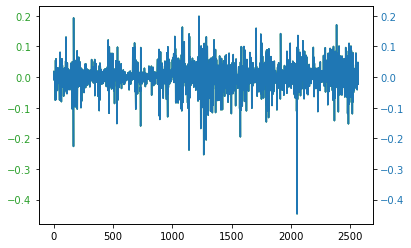

In [72]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.plot(log_crix['v'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue' 
ax2.plot(log_crix['v'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#plt.savefig('fig4.png', transparent=True)
plt.show()

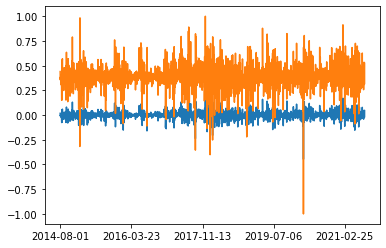

In [75]:
plt.plot(log_crix['date'],log_crix['v'])
plt.plot(log_crix['date'],log_crix['scaled'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(600))